# ライブラリー

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# ![](http://)欠損値埋め

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['Is_train'] = 1
test['Is_train'] = 0
data = pd.concat([train, test], axis=0)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Is_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [5]:
# missing value を埋める
# 最頻値埋めの特徴量
mode_miss = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
             'Functional', 'GarageArea', 'SaleType', 'Utilities']
for col in mode_miss:
    data[col] = data[col].fillna(data[col].mode()[0])
    
# 中央値埋めの特徴量
median_miss = ['LotFrontage', 'GarageYrBlt']
for col in median_miss:
    data[col] = data[col].fillna(data[col].median())
    
# 'None'埋めの特徴量
nan_miss = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'MasVnrType', 'BsmtFinType2',
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
            'MiscFeature']
for col in nan_miss:
    data[col] = data[col].fillna('None')
    
# float0.0埋めの特徴量
zero_miss = ['GarageCars']
for col in zero_miss:
    data[col] = data[col].fillna(0.0)

# 欠損があるものを表示
data.isnull().sum()[data.isnull().sum()!=0]

SalePrice    1459
dtype: int64

# 特徴量エンジニアリング

In [6]:
# utilities dataの中で一つしか異なるデータがなくそれ以外は全て同じ。だからtrain, testのどちらかにしかない
data.drop(['Utilities'], axis=1, inplace=True)

# トータルの面積を作る
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# 外れ値を削除
data = data[data['LotFrontage']!=313.0]
data = data[data['MasVnrArea']!=1600.0]
data = data[data['BsmtFinSF1']!=5644.0]
data = data[(data['GrLivArea']!=4676)&(data['GrLivArea']!=5642)]
data = data[(data['GarageArea']!=1248)&(data['GarageArea']!=1356)&(data['GarageArea']!=1390)]
data = data[data['LotArea']<=100000]

# カテゴリーの仕方を少し変える。わかりやすく区切る
data['BldgType'][(data['BldgType']=='Twnhs')|(data['BldgType']=='Duplex')|(data['BldgType']=='2fmCon')] = 'other'
data['YearBuilt'] = pd.cut(data['YearBuilt'], 6)
data['YearRemodAdd'] = pd.cut(data['YearRemodAdd'], 6)
data['RoofStyle'][(data['RoofStyle']=='Gambrel')|(data['RoofStyle']=='Flat')|(data['RoofStyle']=='Mansard')|(data['RoofStyle']=='Shed')] = 'other'
data['RoofMatl'][(data['RoofMatl']=='WdShngl')|(data['RoofMatl']=='Roll')|(data['RoofMatl']=='ClyTile')|(data['RoofMatl']=='Metal')|(data['RoofMatl']=='Membran')] = 'other'



# カテゴリー変数に変換
cat_list = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt',
            'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
            'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in cat_list:
    data[col] = data[col].astype('category').cat.codes
    data[col] = data[col].astype(np.int64)


# この時点で全ての特徴量がint or floatになっている。
# 欠損値もなく、外れ値もある程度は除去してある。
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Is_train,TotalSF
0,1,60,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,5,5,5,0,0,12,13,1,196.0,2,4,2,2,4,3,2,706.0,6,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500.0,1,2566.0
1,2,20,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,8,4,2,0,0,8,8,2,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500.0,1,2524.0
2,3,60,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,5,5,5,0,0,12,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500.0,1,2706.0
3,4,70,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,5,1,1,0,0,13,15,2,0.0,3,4,0,4,1,3,0,216.0,6,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000.0,1,2473.0
4,5,60,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,5,5,4,0,0,12,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000.0,1,3343.0


スタッキングで線形モデルを使用するためスケーリングの調整とダミー変数に変換する<br>
また線形モデルは多重共線性、冗長な特徴量のマイナスの影響を強く受けるため削除<br>
木モデルと線形要素を含むモデルで使うデータを分ける。

In [7]:
# 少しでも寄与のあったものだけを使う
# lgbモデルでimportanceを確認して重要度の高い30を選択
use_col = ['TotalSF', 'OverallQual', 'Neighborhood', 'GrLivArea', 'OverallCond', 'CentralAir', 'GarageArea', 'LotArea', 'BsmtFinSF1', 'GarageCars',
           'YearRemodAdd', 'KitchenQual', 'Fireplaces', 'GarageYrBlt', 'PavedDrive', 'LotFrontage', 'GarageType', 'TotalBsmtSF', 'ExterCond', 'BsmtFinType1',
           'MoSold', 'FireplaceQu', 'SaleCondition', 'GarageFinish', 'YrSold', 'OpenPorchSF', 'LotShape', 'BsmtExposure', 'MSZoning', 'HalfBath']
base_col = ['Id', 'SalePrice', 'Is_train']

data_lin = data[use_col+base_col]
data_lin.head()

,TotalSF,OverallQual,Neighborhood,GrLivArea,OverallCond,CentralAir,GarageArea,LotArea,BsmtFinSF1,GarageCars,YearRemodAdd,KitchenQual,Fireplaces,GarageYrBlt,PavedDrive,LotFrontage,GarageType,TotalBsmtSF,ExterCond,BsmtFinType1,MoSold,FireplaceQu,SaleCondition,GarageFinish,YrSold,OpenPorchSF,LotShape,BsmtExposure,MSZoning,HalfBath,Id,SalePrice,Is_train
0,2566.0,7,5,1710,5,1,548.0,8450,706.0,2.0,5,2,0,2003.0,2,65.0,1,856.0,4,2,2,3,4,2,2008,61,3,3,3,1,1,208500.0,1
1,2524.0,6,24,1262,8,1,460.0,9600,978.0,2.0,2,3,1,1976.0,2,80.0,1,1262.0,4,0,5,5,4,2,2007,0,3,1,3,0,2,181500.0,1
2,2706.0,7,5,1786,5,1,608.0,11250,486.0,2.0,5,2,1,2001.0,2,68.0,1,920.0,4,2,9,5,4,2,2008,42,0,2,3,1,3,223500.0,1
3,2473.0,7,6,1717,5,1,642.0,9550,216.0,3.0,1,2,1,1998.0,2,60.0,5,756.0,4,0,2,2,0,3,2006,35,0,3,3,0,4,140000.0,1
4,3343.0,8,15,2198,5,1,836.0,14260,655.0,3.0,4,2,1,2000.0,2,84.0,1,1145.0,4,2,12,5,4,2,2008,84,0,0,3,1,5,250000.0,1


In [8]:
# 多重共線性担っている特徴量を削除/加工
data_lin['GarRem_year_mean'] = (data_lin['YearRemodAdd'] + data_lin['GarageYrBlt']) / 2
data_lin.drop(['TotalBsmtSF', 'GarageArea', 'YearRemodAdd', 'GarageYrBlt', 'GrLivArea', 'BsmtFinSF1'],
           axis=1,
           inplace=True)

# neighborhoodは25のユニークな値があるため特徴量の増大につながっている。いい感じに4,5にまとめる
data_lin.loc[(data_lin['Neighborhood']==2)|(data_lin['Neighborhood']==9)|(data_lin['Neighborhood']==10), 'Neighborhood'] = 1
data_lin.loc[(data_lin['Neighborhood']==3) | (data_lin['Neighborhood']==7) | (data_lin['Neighborhood']==17), 'Neighborhood'] = 2
data_lin.loc[(data_lin['Neighborhood']==11) | (data_lin['Neighborhood']==12) | (data_lin['Neighborhood']==13) | (data_lin['Neighborhood']==18) | (data_lin['Neighborhood']==19) | (data_lin['Neighborhood']==1), 'Neighborhood'] = 3 
data_lin.loc[(data_lin['Neighborhood']==0) | (data_lin['Neighborhood']==20) | (data_lin['Neighborhood']==14) | (data_lin['Neighborhood']==8) | (data_lin['Neighborhood']==5) | (data_lin['Neighborhood']==4) | (data_lin['Neighborhood']==6), 'Neighborhood'] = 4 
data_lin.loc[(data_lin['Neighborhood']==21) | (data_lin['Neighborhood']==23) | (data_lin['Neighborhood']==24), 'Neighborhood'] = 5
data_lin.loc[(data_lin['Neighborhood']==15) | (data_lin['Neighborhood']==16) | (data_lin['Neighborhood']==22), 'Neighborhood'] = 6

# 特徴量は25個
data_lin.head()

,TotalSF,OverallQual,Neighborhood,OverallCond,CentralAir,LotArea,GarageCars,KitchenQual,Fireplaces,PavedDrive,LotFrontage,GarageType,ExterCond,BsmtFinType1,MoSold,FireplaceQu,SaleCondition,GarageFinish,YrSold,OpenPorchSF,LotShape,BsmtExposure,MSZoning,HalfBath,Id,SalePrice,Is_train,GarRem_year_mean
0,2566.0,7,4,5,1,8450,2.0,2,0,2,65.0,1,4,2,2,3,4,2,2008,61,3,3,3,1,1,208500.0,1,1004.0
1,2524.0,6,5,8,1,9600,2.0,3,1,2,80.0,1,4,0,5,5,4,2,2007,0,3,1,3,0,2,181500.0,1,989.0
2,2706.0,7,4,5,1,11250,2.0,2,1,2,68.0,1,4,2,9,5,4,2,2008,42,0,2,3,1,3,223500.0,1,1003.0
3,2473.0,7,4,5,1,9550,3.0,2,1,2,60.0,5,4,0,2,2,0,3,2006,35,0,3,3,0,4,140000.0,1,999.5
4,3343.0,8,6,5,1,14260,3.0,2,1,2,84.0,1,4,2,12,5,4,2,2008,84,0,0,3,1,5,250000.0,1,1002.0


In [9]:
# ニューラルネットワーク用のデータを作る
data_nn = data_lin[['TotalSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarRem_year_mean', 'OverallCond', 'GarageType', 'LotArea', 'Fireplaces', 'CentralAir', 'Id', 'SalePrice', 'Is_train']]
dum_col = ['Neighborhood', 'OverallCond', 'GarageType', 'Fireplaces', 'CentralAir']
scale_col = ['TotalSF', 'GarRem_year_mean', 'LotArea', 'GarageCars', 'OverallQual']
data_nn = pd.get_dummies(data_nn, columns=dum_col)
for col in scale_col:
    data_nn[col] = (data_nn[col] - data_nn[col].mean()) / data_nn[col].std()
    
data_nn.head()

,TotalSF,OverallQual,GarageCars,GarRem_year_mean,LotArea,Id,SalePrice,Is_train,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,CentralAir_0,CentralAir_1
0,0.032706,0.649519,0.310733,1.029972,-0.283054,1,208500.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.021110,-0.061626,0.310733,-0.117188,-0.060425,2,181500.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0.212093,0.649519,0.310733,0.953495,0.258999,3,223500.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,-0.086458,0.649519,1.624122,0.685824,-0.070105,4,140000.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1.028304,1.360663,1.624122,0.877017,0.841705,5,250000.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [10]:
data_nn.shape

(2908, 36)

In [11]:
# dummies変数にしなければいけないもの
dum_col = ['PavedDrive', 'GarageType', 'ExterCond', 'BsmtFinType1', 'MoSold', 'FireplaceQu', 'SaleCondition', 'GarageFinish', 'YrSold', 'LotShape', 'BsmtExposure', 'MSZoning',
           'HalfBath', 'OverallCond', 'KitchenQual', 'Fireplaces', 'Neighborhood']
data_lin = pd.get_dummies(data_lin, columns=dum_col)

# 正規化を行うもの
# テストデータを使って正規化してしまっている。　後で修正
scale_col = ['TotalSF', 'LotFrontage', 'OpenPorchSF', 'GarRem_year_mean', 'LotArea', 'OverallQual', 'GarageCars']
for col in scale_col:
    data_lin[col] = (data_lin[col] - data_lin[col].mean()) / data_lin[col].std()
    
data_lin.head()    

,TotalSF,OverallQual,CentralAir,LotArea,GarageCars,LotFrontage,OpenPorchSF,Id,SalePrice,Is_train,GarRem_year_mean,PavedDrive_0,PavedDrive_1,PavedDrive_2,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,...,SaleCondition_5,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,LotShape_0,LotShape_1,LotShape_2,LotShape_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,HalfBath_0,HalfBath_1,HalfBath_2,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,KitchenQual_0,KitchenQual_1,KitchenQual_2,KitchenQual_3,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6
0,0.032706,0.649519,1,-0.283054,0.310733,-0.189879,0.203400,1,208500.0,1,1.029972,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,-0.021110,-0.061626,1,-0.060425,0.310733,0.550493,-0.704566,2,181500.0,1,-0.117188,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0.212093,0.649519,1,0.258999,0.310733,-0.041805,-0.079409,3,223500.0,1,0.953495,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,-0.086458,0.649519,1,-0.070105,1.624122,-0.436670,-0.183602,4,140000.0,1,0.685824,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1.028304,1.360663,1,0.841705,1.624122,0.747925,0.545748,5,250000.0,1,0.877017,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [12]:
data_lin.shape

(2908, 106)

In [13]:
train = data[data['Is_train']==1]
test = data[data['Is_train']==0]
train_lin = data_lin[data_lin['Is_train']==1]
test_lin = data_lin[data_lin['Is_train']==0]
train_nn = data_nn[data_nn['Is_train']==1]
test_nn = data_nn[data_nn['Is_train']==0]

# ターゲットの分布変換

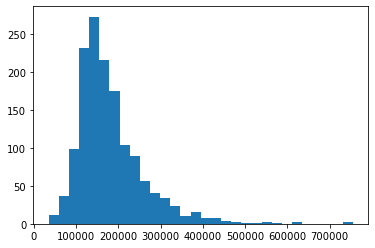

In [14]:
plt.hist(train['SalePrice'], bins=30);

グラフよりターゲットは正規分布になっておらず、右に裾が広がっている
対数変換して正規分布にする必要がある。

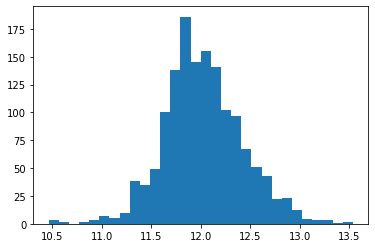

In [15]:
train['SalePrice'] = train['SalePrice'].apply(lambda x: np.log(x))
train_lin['SalePrice'] = train_lin['SalePrice'].apply(lambda x: np.log(x))
train_nn['SalePrice'] = train_nn['SalePrice'].apply(lambda x: np.log(x))
plt.hist(train['SalePrice'], bins=30);

正規分布に近づけることができた。<br>
出力にnp.exp()を計算することを忘れてはいけない。

# ![](http://) モデル生成(第一ステージ)

In [16]:
SEED = 42

In [17]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb

from keras import models, layers
from keras.layers import Dense
from keras import regularizers

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm

Using TensorFlow backend.


In [18]:
from keras import backend as K

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [19]:
params_rf = {'max_depth': [10],
             'n_estimators': [80, 90, 100],
             'min_samples_leaf': [3],
             'n_jobs': [-1],
             'random_state': [SEED]}

params_lgb1 = {
    'num_leaves': 8,
    'bagging_fraction': 0.80,
    'max_depth': 7,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.02,
    'min_data_in_leaf': 5,
    'seed': SEED
}

params_lgb2 = {
    'num_leaves': 2,
    'bagging_fraction': 0.70,
    'max_depth': 3,
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'min_data_in_leaf': 5,
    'seed': SEED
}

params_xgb = {
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'subsample': 0.8,
    'max_depth': 3
}

params_svr ={
    'kernel': ['rbf'],
    'gamma': ['auto'],
    'C': [0.5, 1, 2, 3, 4, 5, 10, 20],
    'epsilon': [0.01, 0.03, 0.05]
}

params_las = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005]
}




# 元々のモデル lightgbmのパラメータ
# params = {
#     'num_leaves': 12,
#     'bagging_fraction': 0.80,
#     'max_depth': 6,
#     'objective': 'regression',
#     'metric': 'rmse',
#     'learning_rate': 0.05,
#     'min_data_in_leaf': 6,
#     'seed': 105
# }

In [20]:
# tree model
# RndomForest, lightgb*2(シンプル・複雑)

# # train_yが第二段階においてもラベルになる
train_y = train['SalePrice'].reset_index(drop=True)
train.drop(['Id', 'SalePrice', 'Is_train'], axis=1, inplace=True)
train_X = train.reset_index(drop=True)
test.drop(['Id', 'SalePrice', 'Is_train'], axis=1, inplace=True)
test_X = test

n_train = train_X.shape[0]
n_test = test_X.shape[0]
kf = KFold(n_splits=4, random_state=SEED, shuffle=True)

lgb1_train_data = np.zeros((n_train,))
lgb2_train_data = np.zeros((n_train,))
xgb_train_data = np.zeros((n_train,))

for train_index, valid_index in tqdm(kf.split(train_X)):
    
    X_tra = train_X.iloc[train_index]
    y_tra = train_y.iloc[train_index]
    X_val = train_X.iloc[valid_index]
    y_val = train_y.iloc[valid_index]
    
    
    # lightgbm1の学習
    train_data = lgb.Dataset(X_tra, y_tra, categorical_feature=cat_list)
    valid_data = lgb.Dataset(X_val, y_val, categorical_feature=cat_list)
    m_lgb1 = lgb.train(params_lgb1, train_data, valid_sets=[train_data, valid_data], verbose_eval=20,
                      num_boost_round=3000, early_stopping_rounds=10)
    lgb1_train_data[valid_index] = m_lgb1.predict(X_val)
    
    # lightgbm2の学習
    train_data = lgb.Dataset(X_tra, y_tra, categorical_feature=cat_list)
    valid_data = lgb.Dataset(X_val, y_val, categorical_feature=cat_list)
    m_lgb2 = lgb.train(params_lgb2, train_data, valid_sets=[train_data, valid_data], verbose_eval=20,
                      num_boost_round=2000, early_stopping_rounds=10)
    lgb2_train_data[valid_index] = m_lgb2.predict(X_val)
    
    # xgbの学習
    train_data = xgb.DMatrix(X_tra, label=y_tra)
    valid_data = xgb.DMatrix(X_val, label=y_val)
    evals = [(train_data, 'train'), (valid_data, 'valid')]
    evals_result = {}
    m_xgb = xgb.train(params_xgb, train_data, verbose_eval=20,
                      num_boost_round=2000, early_stopping_rounds=10,
                      evals=evals, evals_result=evals_result)
    xgb_train_data[valid_index] = m_xgb.predict(valid_data)
    


lgb1_test_data = np.zeros((n_test,))
lgb2_test_data = np.zeros((n_test,))
xgb_test_data = np.zeros((n_test,))

lgb1_test_data = m_lgb1.predict(test_X)
lgb2_test_data = m_lgb2.predict(test_X)

test_X_lgb = xgb.DMatrix(test_X)
xgb_test_data = m_xgb.predict(test_X_lgb)

0it [00:00, ?it/s]

Training until validation scores don't improve for 10 rounds
[20]	training's rmse: 0.298694	valid_1's rmse: 0.30835
[40]	training's rmse: 0.2346	valid_1's rmse: 0.248724
[60]	training's rmse: 0.192346	valid_1's rmse: 0.209521
[80]	training's rmse: 0.164512	valid_1's rmse: 0.1842
[100]	training's rmse: 0.145328	valid_1's rmse: 0.166558
[120]	training's rmse: 0.131792	valid_1's rmse: 0.153423
[140]	training's rmse: 0.121453	valid_1's rmse: 0.143907
[160]	training's rmse: 0.113695	valid_1's rmse: 0.136929
[180]	training's rmse: 0.107417	valid_1's rmse: 0.132703
[200]	training's rmse: 0.10241	valid_1's rmse: 0.129124
[220]	training's rmse: 0.0983747	valid_1's rmse: 0.126407
[240]	training's rmse: 0.0949513	valid_1's rmse: 0.124445
[260]	training's rmse: 0.0920456	valid_1's rmse: 0.123088
[280]	training's rmse: 0.0894548	valid_1's rmse: 0.121983
[300]	training's rmse: 0.087014	valid_1's rmse: 0.120986
[320]	training's rmse: 0.0849409	valid_1's rmse: 0.119908
[340]	training's rmse: 0.0830014

1it [00:00,  1.03it/s]

Training until validation scores don't improve for 10 rounds
[20]	training's rmse: 0.302088	valid_1's rmse: 0.288242
[40]	training's rmse: 0.236087	valid_1's rmse: 0.2268
[60]	training's rmse: 0.19236	valid_1's rmse: 0.188993
[80]	training's rmse: 0.162471	valid_1's rmse: 0.166484
[100]	training's rmse: 0.141288	valid_1's rmse: 0.152794
[120]	training's rmse: 0.126374	valid_1's rmse: 0.144838
[140]	training's rmse: 0.115693	valid_1's rmse: 0.139755
[160]	training's rmse: 0.107487	valid_1's rmse: 0.137009
[180]	training's rmse: 0.10119	valid_1's rmse: 0.134721
[200]	training's rmse: 0.0961492	valid_1's rmse: 0.132803
[220]	training's rmse: 0.0918339	valid_1's rmse: 0.132182
[240]	training's rmse: 0.0880897	valid_1's rmse: 0.13175
[260]	training's rmse: 0.0848871	valid_1's rmse: 0.131359
[280]	training's rmse: 0.0822061	valid_1's rmse: 0.131221
Early stopping, best iteration is:
[288]	training's rmse: 0.0812116	valid_1's rmse: 0.131103
Training until validation scores don't improve for 1

2it [00:01,  1.17it/s]

Training until validation scores don't improve for 10 rounds
[20]	training's rmse: 0.301716	valid_1's rmse: 0.294265
[40]	training's rmse: 0.235806	valid_1's rmse: 0.235539
[60]	training's rmse: 0.192275	valid_1's rmse: 0.198732
[80]	training's rmse: 0.162659	valid_1's rmse: 0.175314
[100]	training's rmse: 0.142275	valid_1's rmse: 0.160185
[120]	training's rmse: 0.128121	valid_1's rmse: 0.150473
[140]	training's rmse: 0.117933	valid_1's rmse: 0.14397
[160]	training's rmse: 0.110207	valid_1's rmse: 0.139598
[180]	training's rmse: 0.104239	valid_1's rmse: 0.136255
[200]	training's rmse: 0.0995991	valid_1's rmse: 0.133959
[220]	training's rmse: 0.0956279	valid_1's rmse: 0.131805
[240]	training's rmse: 0.0922846	valid_1's rmse: 0.130382
[260]	training's rmse: 0.0894137	valid_1's rmse: 0.129179
[280]	training's rmse: 0.0869874	valid_1's rmse: 0.128041
[300]	training's rmse: 0.0847969	valid_1's rmse: 0.127257
[320]	training's rmse: 0.0829297	valid_1's rmse: 0.126563
[340]	training's rmse: 0.

3it [00:02,  1.16it/s]

Training until validation scores don't improve for 10 rounds
[20]	training's rmse: 0.294808	valid_1's rmse: 0.3182
[40]	training's rmse: 0.23157	valid_1's rmse: 0.254618
[60]	training's rmse: 0.189971	valid_1's rmse: 0.214393
[80]	training's rmse: 0.162472	valid_1's rmse: 0.187735
[100]	training's rmse: 0.143439	valid_1's rmse: 0.167338
[120]	training's rmse: 0.130057	valid_1's rmse: 0.154231
[140]	training's rmse: 0.120511	valid_1's rmse: 0.14438
[160]	training's rmse: 0.113463	valid_1's rmse: 0.137166
[180]	training's rmse: 0.107674	valid_1's rmse: 0.13168
[200]	training's rmse: 0.103101	valid_1's rmse: 0.127734
[220]	training's rmse: 0.0991196	valid_1's rmse: 0.124625
[240]	training's rmse: 0.0958028	valid_1's rmse: 0.12248
[260]	training's rmse: 0.0927896	valid_1's rmse: 0.121022
[280]	training's rmse: 0.0901864	valid_1's rmse: 0.119941
[300]	training's rmse: 0.087851	valid_1's rmse: 0.118705
[320]	training's rmse: 0.0857517	valid_1's rmse: 0.118047
[340]	training's rmse: 0.0836645

4it [00:03,  1.18it/s]


In [21]:
# standard neural network

train_nn_y = train_nn['SalePrice']
train_nn.drop(['Id', 'SalePrice', 'Is_train'], axis=1, inplace=True)
train_nn_X = train_nn
test_nn.drop(['Id', 'SalePrice', 'Is_train'], axis=1, inplace=True)
test_nn_X = test_nn

nn_train_data = np.zeros((n_train,))

for train_index, valid_index in tqdm(kf.split(train_X)):
    
    X_tra = train_nn_X.iloc[train_index]
    y_tra = train_nn_y.iloc[train_index]
    X_val = train_nn_X.iloc[valid_index]
    y_val = train_nn_y.iloc[valid_index]
    
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(33,), kernel_regularizer=regularizers.l1(0.01)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',
              loss= 'mse',
              metrics=[rmse])
    
    model.fit(X_tra, y_tra, epochs=120, batch_size=32, validation_data=[X_val, y_val])
    nn_train_data[valid_index] = model.predict(X_val).reshape(-1,)
    
nn_test_data = np.zeros((n_test,))
nn_test_data = model.predict(test_nn_X)


# チューニングが難しい 振れ幅が大きい
# 次元数がやや多め　いらない特徴量が多いからl1正則化を行なったらかなりいい効果

0it [00:00, ?it/s]

Train on 1086 samples, validate on 363 samples
Epoch 1/120
1086/1086 [==============================] - 0s 413us/step - loss: 128.6705 - rmse: 11.1337 - val_loss: 95.7537 - val_rmse: 9.5407
Epoch 2/120
1086/1086 [==============================] - 0s 58us/step - loss: 41.8130 - rmse: 5.3358 - val_loss: 11.2523 - val_rmse: 1.9865
Epoch 3/120
1086/1086 [==============================] - 0s 57us/step - loss: 6.9829 - rmse: 1.3817 - val_loss: 6.1789 - val_rmse: 1.1433
Epoch 4/120
1086/1086 [==============================] - 0s 56us/step - loss: 5.1297 - rmse: 0.9010 - val_loss: 5.0977 - val_rmse: 0.8718
Epoch 5/120
1086/1086 [==============================] - 0s 56us/step - loss: 4.4263 - rmse: 0.6856 - val_loss: 4.3792 - val_rmse: 0.6334
Epoch 6/120
1086/1086 [==============================] - 0s 66us/step - loss: 3.9980 - rmse: 0.5409 - val_loss: 3.9889 - val_rmse: 0.5212
Epoch 7/120
1086/1086 [==============================] - 0s 59us/step - loss: 3.7379 - rmse: 0.4642 - val_loss: 3.7074

1it [00:09,  9.10s/it]

Train on 1087 samples, validate on 362 samples
Epoch 1/120
1087/1087 [==============================] - 0s 292us/step - loss: 145.5157 - rmse: 11.8898 - val_loss: 135.3417 - val_rmse: 11.4628
Epoch 2/120
1087/1087 [==============================] - 0s 81us/step - loss: 110.5027 - rmse: 10.2755 - val_loss: 64.0656 - val_rmse: 7.7113
Epoch 3/120
1087/1087 [==============================] - 0s 59us/step - loss: 21.6380 - rmse: 3.3510 - val_loss: 6.2714 - val_rmse: 1.1246
Epoch 4/120
1087/1087 [==============================] - 0s 59us/step - loss: 5.4177 - rmse: 1.0167 - val_loss: 5.0921 - val_rmse: 0.8729
Epoch 5/120
1087/1087 [==============================] - 0s 62us/step - loss: 4.5336 - rmse: 0.7556 - val_loss: 4.4339 - val_rmse: 0.7128
Epoch 6/120
1087/1087 [==============================] - 0s 58us/step - loss: 4.0583 - rmse: 0.6160 - val_loss: 4.0202 - val_rmse: 0.6037
Epoch 7/120
1087/1087 [==============================] - 0s 58us/step - loss: 3.7290 - rmse: 0.5146 - val_loss: 3

2it [00:18,  9.11s/it]

Train on 1087 samples, validate on 362 samples
Epoch 1/120
1087/1087 [==============================] - 0s 261us/step - loss: 124.3404 - rmse: 10.9235 - val_loss: 93.0293 - val_rmse: 9.3839
Epoch 2/120
1087/1087 [==============================] - 0s 59us/step - loss: 42.4678 - rmse: 5.3838 - val_loss: 9.3423 - val_rmse: 1.5656
Epoch 3/120
1087/1087 [==============================] - 0s 58us/step - loss: 8.0809 - rmse: 1.4540 - val_loss: 6.1895 - val_rmse: 1.1944
Epoch 4/120
1087/1087 [==============================] - 0s 57us/step - loss: 5.6223 - rmse: 0.9806 - val_loss: 5.1043 - val_rmse: 0.9007
Epoch 5/120
1087/1087 [==============================] - 0s 58us/step - loss: 4.8589 - rmse: 0.8077 - val_loss: 4.5787 - val_rmse: 0.7668
Epoch 6/120
1087/1087 [==============================] - 0s 58us/step - loss: 4.3857 - rmse: 0.6835 - val_loss: 4.1405 - val_rmse: 0.6228
Epoch 7/120
1087/1087 [==============================] - 0s 59us/step - loss: 4.0341 - rmse: 0.5898 - val_loss: 3.8818 

3it [00:27,  9.02s/it]

Train on 1087 samples, validate on 362 samples
Epoch 1/120
1087/1087 [==============================] - 0s 261us/step - loss: 121.7398 - rmse: 10.8147 - val_loss: 88.5288 - val_rmse: 9.1725
Epoch 2/120
1087/1087 [==============================] - 0s 63us/step - loss: 38.3868 - rmse: 5.0964 - val_loss: 10.0818 - val_rmse: 1.7649
Epoch 3/120
1087/1087 [==============================] - 0s 67us/step - loss: 7.5338 - rmse: 1.4217 - val_loss: 5.8137 - val_rmse: 1.0672
Epoch 4/120
1087/1087 [==============================] - 0s 69us/step - loss: 5.3573 - rmse: 0.8945 - val_loss: 4.9290 - val_rmse: 0.7978
Epoch 5/120
1087/1087 [==============================] - 0s 66us/step - loss: 4.7050 - rmse: 0.7126 - val_loss: 4.4821 - val_rmse: 0.6552
Epoch 6/120
1087/1087 [==============================] - 0s 63us/step - loss: 4.3207 - rmse: 0.5966 - val_loss: 4.1870 - val_rmse: 0.5604
Epoch 7/120
1087/1087 [==============================] - 0s 64us/step - loss: 4.0564 - rmse: 0.5165 - val_loss: 3.9583

4it [00:37,  9.31s/it]


In [22]:
# linear model
# svm, Lasso

train_lin_y = train_lin['SalePrice']
train_lin.drop(['Id', 'SalePrice', 'Is_train'], axis=1, inplace=True)
train_lin_X = train_lin
test_lin.drop(['Id', 'SalePrice', 'Is_train'], axis=1, inplace=True)
test_lin_X = test_lin

svr_train_data = np.zeros((n_train,))
las_train_data = np.zeros((n_train,))
rf_train_data = np.zeros((n_train,))

for train_index, valid_index in tqdm(kf.split(train_X)):
    
    X_tra = train_lin_X.iloc[train_index]
    y_tra = train_lin_y.iloc[train_index]
    X_val = train_lin_X.iloc[valid_index]
    y_val = train_lin_y.iloc[valid_index]
    
    # SVRでの学習
    svr = GridSearchCV(SVR(), params_svr, cv=4, scoring='neg_root_mean_squared_error')
    svr.fit(X_tra, y_tra)
    svr_train_data[valid_index] = svr.predict(X_val)
    
    print('SVR: best parameter...', svr.best_params_)
    
    # Lassoでの学習
    las = GridSearchCV(Lasso(), params_las, cv=4, scoring='neg_root_mean_squared_error')
    las.fit(X_tra, y_tra)
    las_train_data[valid_index] = las.predict(X_val)
    
    print('Lasso: best parameter...', las.best_params_)
    
    # ランダムフォレストの学習
    rf = GridSearchCV(RandomForestRegressor(), params_rf, cv=4, scoring='neg_root_mean_squared_error')
    rf.fit(X_tra, y_tra)
    rf_train_data[valid_index] = rf.predict(X_val)
    
    print('RandomForest: best parameter...', rf.best_params_)
    
    
svr_test_data = np.zeros((n_test,))
las_test_data = np.zeros((n_test,))
rf_test_data = np.zeros((n_test,))

svr_test_data = svr.predict(test_lin_X)
las_test_data = las.predict(test_lin_X)
rf_test_data = rf.predict(test_lin_X)

0it [00:00, ?it/s]

SVR: best parameter... {'C': 2, 'epsilon': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
Lasso: best parameter... {'alpha': 0.0005}


1it [00:31, 31.99s/it]

RandomForest: best parameter... {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 90, 'n_jobs': -1, 'random_state': 42}
SVR: best parameter... {'C': 3, 'epsilon': 0.03, 'gamma': 'auto', 'kernel': 'rbf'}
Lasso: best parameter... {'alpha': 0.0005}


2it [01:03, 31.74s/it]

RandomForest: best parameter... {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
SVR: best parameter... {'C': 3, 'epsilon': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
Lasso: best parameter... {'alpha': 0.0005}


3it [01:34, 31.62s/it]

RandomForest: best parameter... {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
SVR: best parameter... {'C': 3, 'epsilon': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
Lasso: best parameter... {'alpha': 0.0005}


4it [02:05, 31.36s/it]

RandomForest: best parameter... {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


In [23]:
rf_train_data = rf_train_data.reshape(-1,1)
lgb1_train_data = lgb1_train_data.reshape(-1,1)
lgb2_train_data = lgb2_train_data.reshape(-1,1)
xgb_train_data = xgb_train_data.reshape(-1,1)
svr_train_data = svr_train_data.reshape(-1,1)
las_train_data = las_train_data.reshape(-1,1)
nn_train_data = nn_train_data.reshape(-1,1)

rf_test_data = rf_test_data.reshape(-1,1)
lgb1_test_data = lgb1_test_data.reshape(-1,1)
lgb2_test_data = lgb2_test_data.reshape(-1,1)
xgb_test_data = xgb_test_data.reshape(-1,1)
svr_test_data = svr_test_data.reshape(-1,1)
las_test_data = las_test_data.reshape(-1,1)
nn_test_data = nn_test_data.reshape(-1,1)

In [24]:
next_train_X = np.concatenate([rf_train_data, lgb1_train_data, lgb2_train_data, xgb_train_data, svr_train_data, las_train_data, nn_train_data], axis=1)
next_train_y = train_y
next_test_X = np.concatenate([rf_test_data, lgb1_test_data, lgb2_test_data, xgb_test_data, svr_test_data, las_test_data, nn_test_data], axis=1)

In [25]:
show = pd.DataFrame(next_train_X)
show['target'] = next_train_y
show.head(20)

,0,1,2,3,4,5,6,target
0,12.184126,12.196486,12.197665,12.224869,12.190736,12.183172,12.210746,12.247694
1,12.068608,12.058954,12.157972,12.054520,12.169537,12.142355,12.116506,12.109011
2,12.263009,12.239101,12.251726,12.264483,12.254715,12.278643,12.235009,12.317167
3,12.113992,12.147276,12.118179,11.978201,12.073285,12.064201,12.197929,11.849398
4,12.520871,12.595746,12.579269,12.564714,12.626859,12.598269,12.602813,12.429216
5,11.903063,11.945495,11.933367,11.943114,11.939174,11.889015,11.838122,11.870600
6,12.427346,12.525491,12.506274,12.512464,12.402527,12.446777,12.477822,12.634603
7,12.353837,12.376210,12.337271,12.272230,12.259677,12.346206,12.395230,12.206073
8,11.929432,11.767098,11.806631,11.719832,11.817242,11.800272,11.977718,11.774520
9,11.747955,11.807177,11.767547,11.778460,11.775827,11.799211,11.804817,11.678440


In [26]:
show.shape

(1449, 8)

# スタッキング (第二ステージ)

In [27]:
# # 第二段階ではシンプルに線形回帰で行う
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()

# train_X = next_train_X
# train_y = next_train_y
# test_X = next_test_X

# lr.fit(train_X, train_y)
# y_predict = lr.predict(test_X)

# y_submission = np.exp(y_predict)

In [28]:
# 第二段階svmでもやってみる
train_X = next_train_X
train_y = next_train_y
test_X = next_test_X

svr2 = SVR()
svr2.fit(train_X, train_y)
y_predict = svr2.predict(test_X)
y_submission = np.exp(y_predict)

In [29]:
# y_submission = np.exp(nn_test_data)

In [30]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = y_submission
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,123172.465369
1,1462,165169.157435
2,1463,183598.116668
3,1464,195977.652679
4,1465,198910.442910


# まとめ
スタッキングを行うことでscoreが割と上がった。(0.007上昇)<br>
ランダムフォレスト, lgb×2, xgb, nn(線形), SVR, Lasso (nnは省いた方が精度がいい 0.002ほど)<br>
スタッキング-> SVR(線形回帰よりも精度がいい)
